# Pauta C3b

In [4]:
#!pip install geopandas
#!pip install rtree
#!pip install pygeos
#!pip install osmnx
#!pip install matplotlib
#!pip install geopy

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox

/home/topkaj/.local/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [6]:
# Descomprimir data.zip.
#!unzip data.zip 

In [7]:
# Lectura de archivos (ojo con tener carpeta 'data' en el mismo directorio de este .ipynb)
distritos = gpd.read_file('data/Distritos Censales/Distritos Censales RM.shp')
chile_urbano = gpd.read_file('data/Areas Urbanas/areas_urbanas.shp')

## Misión 0

In [8]:
distritos.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6..."
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6..."
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6..."
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((344856.320 6298892.632, 345672.277 6..."
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((343856.526 6298225.435, 344041.982 6..."


In [9]:
chile_urbano.head()

,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,Chiguayante,Ciudad,29855.998337,1.038076e+07,"POLYGON ((140044.634 5911024.284, 140051.361 5..."
1,Lota,Ciudad,14233.349738,5.262642e+06,"POLYGON ((131359.666 5889462.902, 131475.343 5..."
2,Coronel,Ciudad,41577.791832,1.551685e+07,"POLYGON ((127278.440 5896965.436, 127411.675 5..."
3,San Rosendo,Ciudad,6499.369423,1.534402e+06,"POLYGON ((168583.830 5870293.970, 168725.579 5..."
4,Concepción,Ciudad,82986.894378,3.454227e+07,"POLYGON ((133504.854 5919782.212, 136052.580 5..."


<AxesSubplot:>

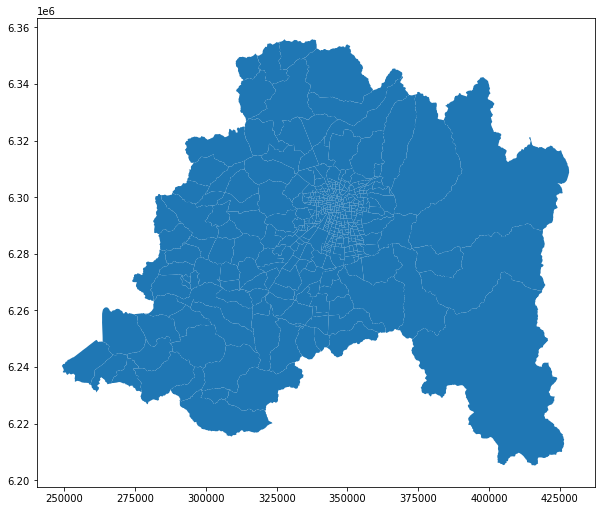

In [10]:
distritos.plot(figsize = (10,10))

<AxesSubplot:>

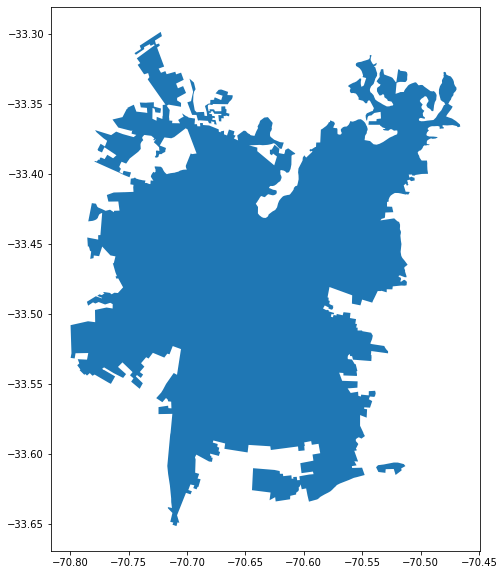

In [11]:
chile_urbano.to_crs("EPSG:4326", inplace=True) # Aplicar sistema de referencia
santiago_urbano = chile_urbano.loc[chile_urbano['NOMBRE']=='Santiago'] # Filtrar Áreas Urbanas de Santiago
santiago_urbano.plot(figsize = (10,10))

# .loc[...] es recomendable de usar para búsqueda por filas

In [12]:
# Aplicar sistema de referencia
distritos.to_crs("EPSG:4326", inplace=True)

In [13]:
# Intersección de los distritos y santiago urbano
distritos_urbano = gpd.overlay(distritos, santiago_urbano, how='intersection') 

<AxesSubplot:>

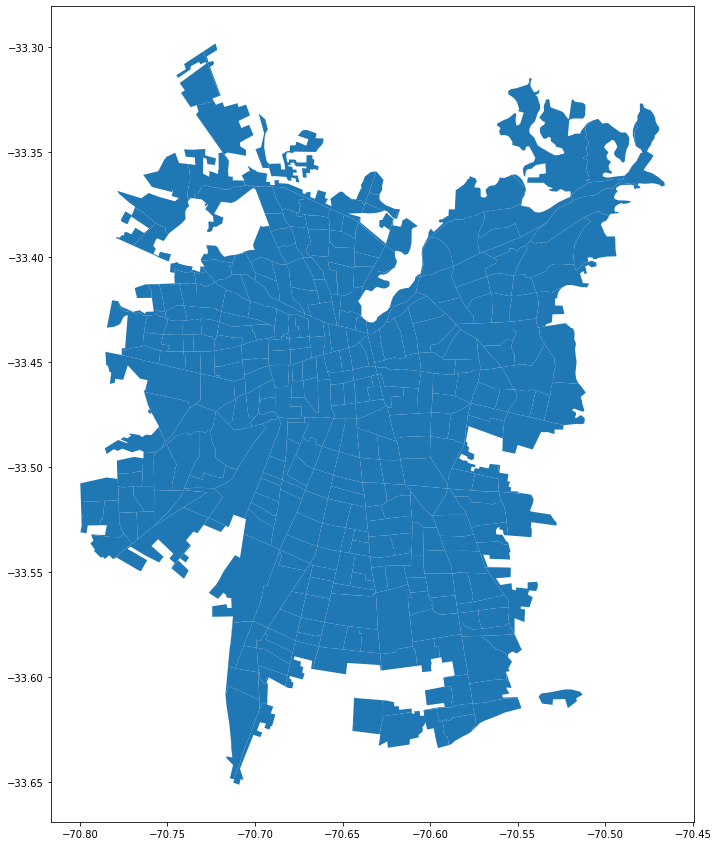

In [14]:
distritos_urbano.plot(figsize = (15,15))

In [15]:
# Consulta a OSM para obtener un grafo de la zona de Macul incorporando el mayor detalle de calles y pasajes
red_macul = ox.graph_from_place('Macul, Chile', network_type='all_private')

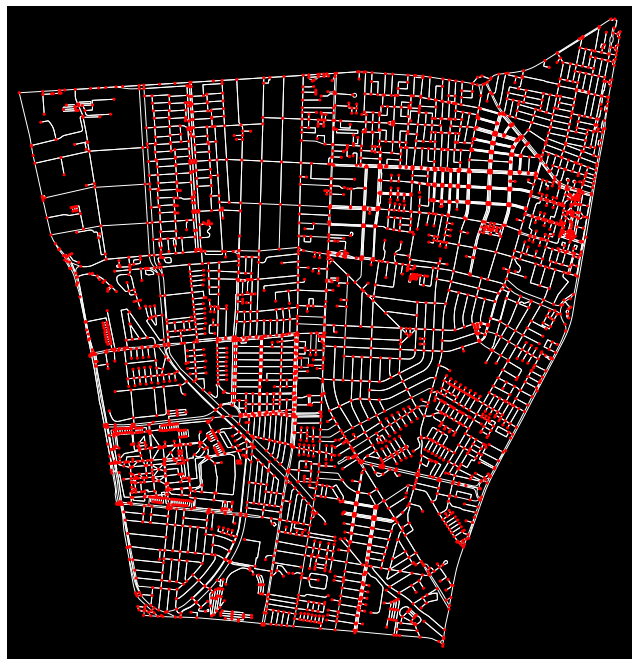

(<Figure size 864x864 with 1 Axes>, <AxesSubplot:>)

In [16]:
ox.plot_graph(red_macul, figsize = (12,12), node_size=10, bgcolor='black', node_color='red', edge_color='white')

## Misión 1

In [17]:
estaciones_metro = gpd.read_file('data/Metro 2020/Estaciones_2020/Estaciones_2020.shp') # Lectura de datos
estaciones_metro.to_crs("EPSG:4326", inplace=True) # Aplicar sistema de referencia

In [18]:
# Encontrar estación San Joaquín
estacion_san_joaquin = estaciones_metro.loc[estaciones_metro["ESTACION"]=="SAN JOAQUIN"]
sj_x, sj_y = *estacion_san_joaquin.iloc[0].geometry.xy, # Coordenadas de la geometría (lng/lat)
estacion_san_joaquin

,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,geometry
43,46,5,L5,SAN JOAQUIN,San Joaquín,349853.0827,6.292455e+06,POINT (-70.61593 -33.49900)


In [19]:
# Se buscan dos puntos límites para construir un Bounding Box
SP = (-33.50322533436012, -70.61789042084175) # Límite Surponiente
NO = (-33.49350538639316, -70.60283476758836) # Límite Nororiente

# Consulta a OSM para obtener un grafo a partir del BoundingBox, con el mayor detalle de calles/pasajes
red_campus = ox.graph_from_bbox(NO[0], SP[0], NO[1], SP[1], network_type= 'all_private')

In [20]:
# Encontrar el nodo más cercano de la red del campus a la estación San Joaquín
sj = ox.distance.nearest_nodes(red_campus, sj_x[0], sj_y[0])

# Coordenadas de la sala BC24 [Google Maps]
bc24_x, bc24_y = -70.61309032673567, -33.50041672975557 # Longitud, Latitud

# Encontrar el nodo más cercano de la red del campus a la sala BC24
bc24 = ox.distance.nearest_nodes(red_campus, bc24_x, bc24_y)

In [21]:
# Ruta más corta entre el metro San Joaquín y la sala BC24, según distancia
ruta = nx.shortest_path(red_campus, sj, bc24, weight="length")

# Valor de la ruta más corta, en este caso la distancia
distancia = nx.shortest_path_length(red_campus, sj, bc24, weight="length")

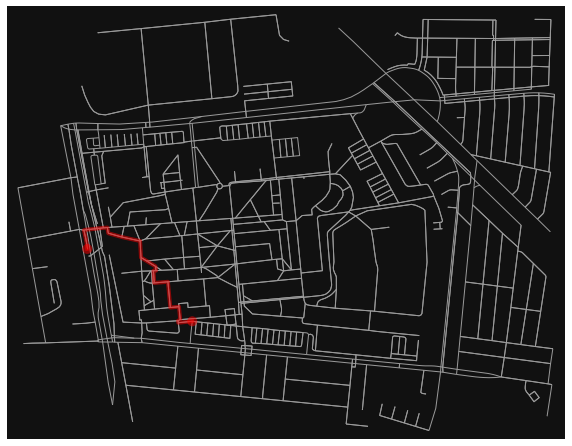

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [22]:
ox.plot_graph_route(red_campus, ruta, node_size=0.1, figsize=(10,10))

In [23]:
# Velocidad promedio de una persona caminando = 0,92 m/s
tiempo = distancia/0.92 # T = D / V
tiempo = tiempo/60 # Segundos a Minutos
print(f"> La persona tardaría {round(tiempo, 2)} minutos caminando desde San Joaquín hasta BC24")

> La persona tardaría 10.0 minutos caminando desde San Joaquín hasta BC24


## Misión 2

In [24]:
# Incorporamos 'tags' para descargar información del tipo de railway en nodos y aristas.
# Podrían agregarse otros 'tags' útiles, como 'name'. Revisar sitio de OSM para conocer datos disponibles.
ox.settings.useful_tags_way += ['railway']
ox.settings.useful_tags_node += ['railway']

cf='["railway"~"subway|station"]' # Filtro personalizado para obtener los nodos que pertenezcan a una red de metro

# Consulta a OSM para obtener un grafo según un polígono de referencia y un filtro personalizado. 
# simplify=False permite el mayor nivel de detalle en el número de nodos
red_metro = ox.graph.graph_from_polygon(santiago_urbano.geometry.item(), simplify=False, retain_all=True, custom_filter=cf)

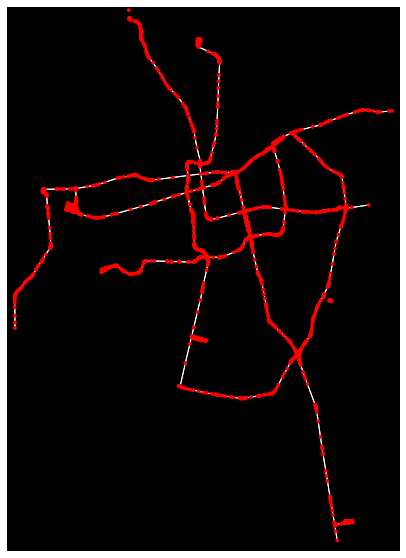

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [25]:
ox.plot_graph(red_metro, figsize = (10,10), bgcolor='black', node_color='red', edge_color='white')

In [26]:
# Análogamente al caso anterior, pero con un filtro personalizado para obtener todas las calles
# que sean del tipo primaria (avenidas y calles principales), secundaria (calles de menor tránsito) o terciarias (pasajes).
# Además, se especifica que el tipo de red sea peatonal 'walk'. 
red_caminando = ox.graph.graph_from_polygon(santiago_urbano.geometry.item(), 
                    custom_filter='["highway"~"primary|secondary|tertiary"]', network_type='walk')

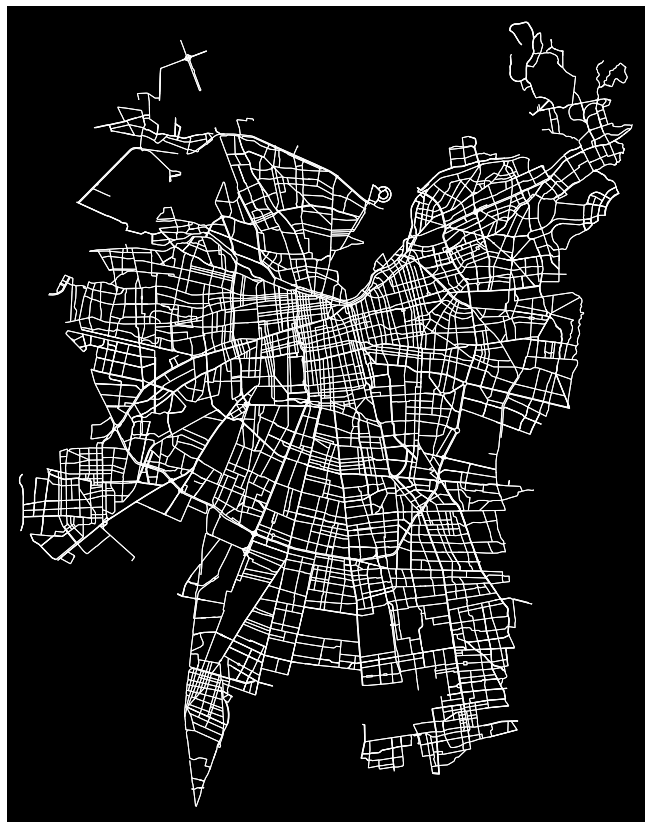

(<Figure size 1080x1080 with 1 Axes>, <AxesSubplot:>)

In [27]:
ox.plot_graph(red_caminando, figsize=(15,15), bgcolor='black', node_color='red', edge_color='white', node_alpha=0)

In [28]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(red_caminando) # Convertir grafo a GeoDataframe
gdf_edges["maxspeed"] = 3 # Agregar columna con velocidad promedio de una persona caminando (km/h)
red_caminando = ox.graph_from_gdfs(gdf_nodes, gdf_edges) # Convertir GeoDataframe a grafo
red_caminando = ox.add_edge_speeds(red_caminando) # Añade dato de velocidades para cada arista
red_caminando = ox.add_edge_travel_times(red_caminando) # Añade el weight='travel_time' a cada arista

In [29]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(red_metro)
gdf_edges["highway"]= "subway" # Agregar columna con tipo de ruta: metro subterráneo
gdf_edges["maxspeed"]= 34.4 # Velocidad promedio del Metro de Santiago (km/h)
red_metro = ox.graph_from_gdfs(gdf_nodes, gdf_edges)
red_metro = ox.add_edge_speeds(red_metro)
red_metro = ox.add_edge_travel_times(red_metro)

In [30]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(red_campus)
gdf_edges["maxspeed"] = 3
red_ps = ox.graph_from_gdfs(gdf_nodes, gdf_edges)
red_ps = ox.add_edge_speeds(red_ps)
red_ps = ox.add_edge_travel_times(red_ps)

In [31]:
# Fitramos los nodos de la red de Metro que corresponden a estaciones
nodos_metro, _ = ox.utils_graph.graph_to_gdfs(red_metro)
estaciones = nodos_metro.loc[nodos_metro["railway"]=="station"]
estaciones

,y,x,street_count,railway,highway,geometry
osmid,,,,,,
227926453,-33.469912,-70.656378,2,station,NaN,POINT (-70.65638 -33.46991)
252527589,-33.413499,-70.582672,2,station,NaN,POINT (-70.58267 -33.41350)
252527592,-33.415396,-70.589687,2,station,NaN,POINT (-70.58969 -33.41540)
252527596,-33.416617,-70.595712,2,station,NaN,POINT (-70.59571 -33.41662)
252527597,-33.418202,-70.601495,3,station,NaN,POINT (-70.60150 -33.41820)
...,...,...,...,...,...,...
6228531275,-33.458255,-70.643079,2,station,NaN,POINT (-70.64308 -33.45825)
6228531280,-33.406854,-70.660900,2,station,NaN,POINT (-70.66090 -33.40685)
6228531279,-33.417670,-70.656441,2,station,NaN,POINT (-70.65644 -33.41767)


In [32]:
red_cm = nx.compose(red_caminando, red_metro) # Composición de la red caminando y la red de metro

## Añadir edges entre estaciones de metro y la calle
for id, nodo in estaciones.iterrows():
    nodo_cercano = ox.distance.nearest_nodes(red_caminando, nodo['x'], nodo['y'])
    red_cm.add_edge(id, nodo_cercano, length=0, maxspeed=3)
    red_cm.add_edge(nodo_cercano, id, length=0, maxspeed=3)
    # Length debería entregarse como la distancia entre ambos pares lat/lng. Ver función de GeoPy más abajo :)

red_cm = ox.add_edge_speeds(red_cm)
red_cm = ox.add_edge_travel_times(red_cm)

red_completa = nx.compose(red_cm, red_campus) # Composición de la red caminando-metro y la red del campus

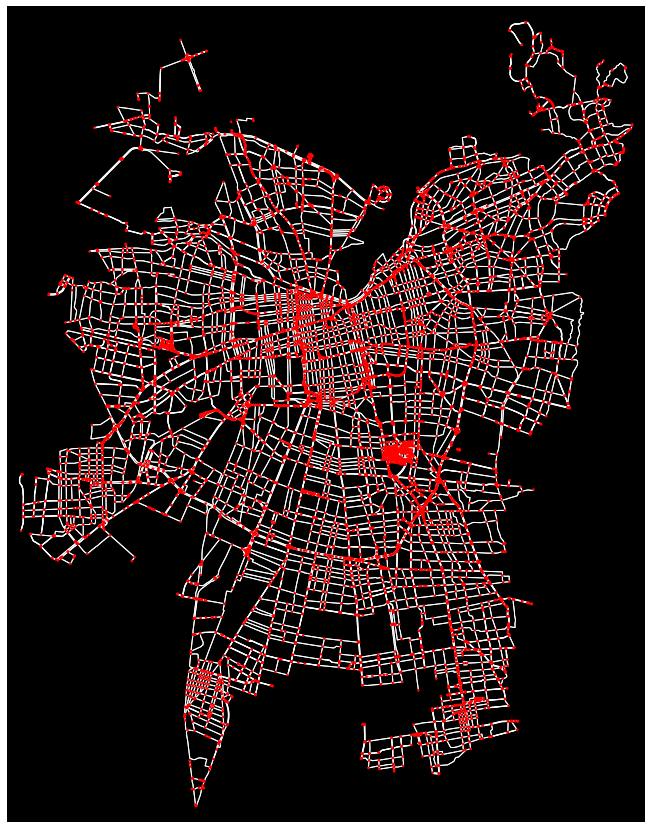

(<Figure size 1080x1080 with 1 Axes>, <AxesSubplot:>)

In [33]:
ox.plot_graph(red_completa, figsize = (15,15), node_size=7, bgcolor='black', node_color='red', edge_color='white')

Tiempo de viaje: 78.23 minutos


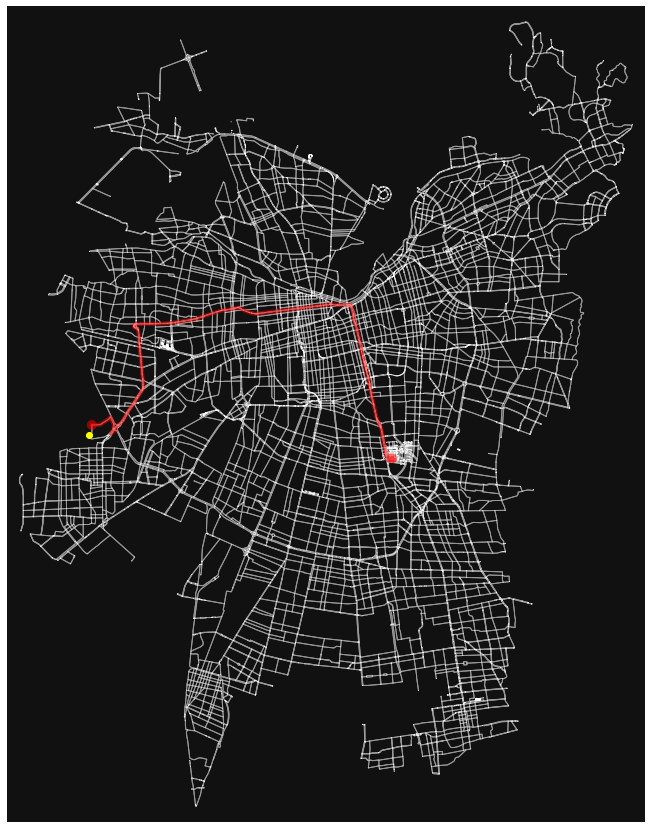

In [34]:
# Para obtener solamente nodos que puedan ser alcanzados por cualquier otro nodo de la red
# red_completa_fuerte = ox.utils_graph.get_largest_component(red_completa, strongly=True) 

# Ejemplo para ver si la red completa funciona. Calculemos la ruta desde mi casa a la sala BC24:
origin = ox.distance.nearest_nodes(red_completa, -70.76428236323396, -33.49078258111745) # Nodo más cercano a mi casa

travel_time = nx.shortest_path_length(red_completa, origin, bc24, weight='travel_time')
route = nx.shortest_path(red_completa, origin, bc24, weight='travel_time')

print(f"Tiempo de viaje: {round(travel_time / 60, 2)} minutos")

# Para graficar dos o más elementos diferentes en un mismo grafo:  
fig, ax = ox.plot_graph_route(red_completa, route, node_size = 1, figsize=(15,15), show=False, close=False)
ax.scatter(-70.76428236323396, -33.49078258111745, c='yellow') # Para cargar un tercero, usar 'ax'.

plt.show() # Mostrar el gráfico

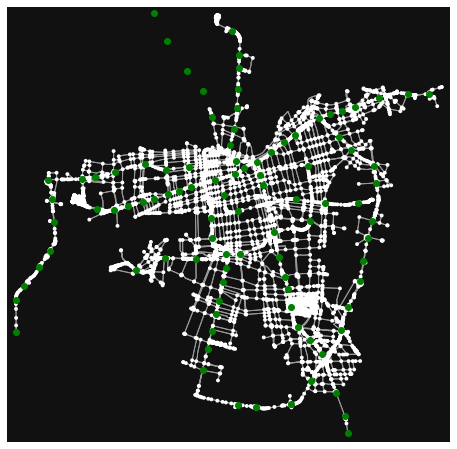

In [35]:
# Trucamos el mapa según el tiempo de viaje máximo en segundos
# Esto devuelve todos los nodos que pueden ser alcanzados desde un punto de referencia en una ventana de tiempo
red_truncada = ox.truncate.truncate_graph_dist(red_completa, sj, max_dist=45*60, weight='travel_time', retain_all=False)
fig, ax = ox.plot_graph(red_truncada, show=False, close=False)

# Graficamos las estaciones de metro
estaciones.plot(ax=ax, facecolor='green', figsize=(5,5))

plt.show()

In [36]:
from geopy import distance

def distancia_a_destino(lng, lat): # x: lng, y: lat
    origen = (lat, lng)
    destino = (bc24_y, bc24_x)
    return distance.geodesic(origen, destino).km # Función para calcular distancia de GeoPy en km

nodos_truncados, _ = ox.graph_to_gdfs(red_truncada) # Grafo a GeoDataframe

# Agregamos columna con la distancia de cada nodo a la sala BC24
nodos_truncados['dist_to_bc24'] = nodos_truncados.apply(lambda x: distancia_a_destino(x['x'], x['y']), axis=1)

# Encontramos aquella fila que corresponda a la con mayor distancia a BC24
mas_lejano = nodos_truncados.query('dist_to_bc24 == dist_to_bc24.max()')

# Luego, sólo resta ver a qué distrito pertenece el par lng/lat encontrado, usando un SJOIN
# con la operación 'within' para saber cuál de los distritos contiene nuestro nodo más lejano:
distrito = gpd.sjoin(mas_lejano, distritos_urbano, predicate='within', how='inner')["NOM_DIS"]
distrito.values[0]

'Huechuraba'

## Misión 3: Propuesto 😝

La idea es la misma: Agregar otra red con velocidades para los vehículos, y según cómo modelen, agregar un nodo que conecte el estacionamiento con la red del campus. Cualquier duda, no olviden realizar una issue :)